In [45]:
# Load Dataset 
import pandas as pd
train_dataset = pd.read_csv("data_m/mnist_train.csv")
test_dataset = pd.read_csv("data_m/mnist_test.csv")

In [46]:
# Check Train Set 
train_dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Check Test Set 
test_dataset = test_dataset.iloc[:, 1:] # labe of test dataset will be removed. 
test_dataset.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Split to Image & Label
train_images = (train_dataset.iloc[:,1:].values).astype("float32")
train_labels = train_dataset["label"].values
test_images = (test_dataset.values).astype("float32")

In [49]:
# Check Train Data's Image
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
# Check Train Data's Label 
train_labels 

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [53]:
# Check Test Data's Image 
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
# Split into Train, Valid Dataset 
from sklearn.model_selection import train_test_split
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images,
                                                                         train_labels, 
                                                                         stratify = train_labels, 
                                                                         random_state = 42, 
                                                                         test_size = 0.2)

In [55]:
# Check Train, Valid, Test Image's Shape 
print("The Shape of Train Images: ", train_images.shape)
print("The Shape of Valid Images: ", valid_images.shape)
print("The Shape of Test Images: ", test_images.shape)


The Shape of Train Images:  (48000, 784)
The Shape of Valid Images:  (12000, 784)
The Shape of Test Images:  (10000, 784)


In [56]:
# Check Train, Valid Label's shape
print("The Shape of Train Labels: ", train_labels.shape)
print("The Shape of Valid Labels: ", valid_labels.shape)


The Shape of Train Labels:  (48000,)
The Shape of Valid Labels:  (12000,)


In [57]:
# Reshape image's size to check for ours
train_images = train_images.reshape(train_images.shape[0], 28, 28)
valid_images = valid_images.reshape(valid_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

In [58]:
# Check Train, Valid, Test Image's Shape after reshape
print("The Shape of Train Images:", train_images.shape)
print("The Shape of Valid Images:", valid_images.shape)
print("The Shape of Test Images:", test_images.shape)

The Shape of Train Images: (48000, 28, 28)
The Shape of Valid Images: (12000, 28, 28)
The Shape of Test Images: (10000, 28, 28)


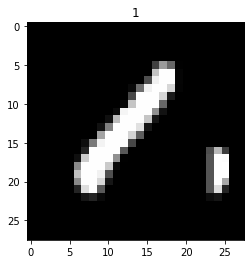

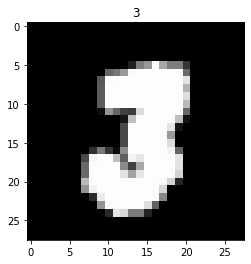

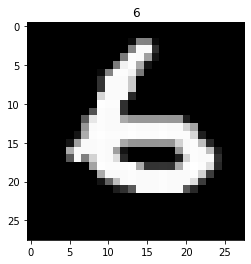

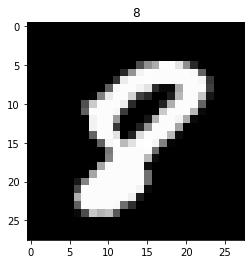

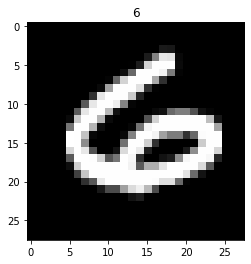

In [28]:
# Visualize Train, Valid, Test's Images

import matplotlib.pyplot as plt
for idx in range(0, 5):
    plt.imshow(train_images[idx], cmap = plt.get_cmap('gray'))
    plt.title(train_labels[idx])
    plt.show()


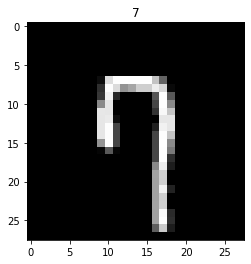

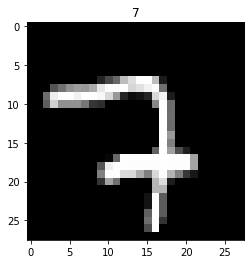

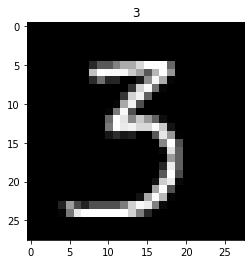

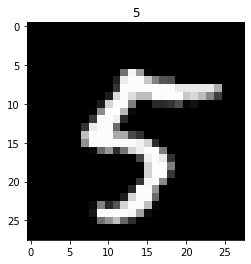

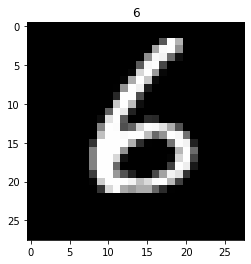

In [59]:
for idx in range(0,5):
    plt.imshow(valid_images[idx], cmap = plt.get_cmap('gray'))
    plt.title(valid_labels[idx])
    plt.show()

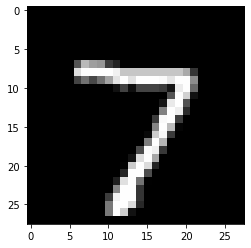

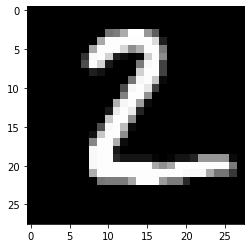

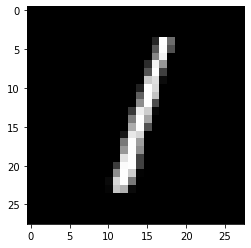

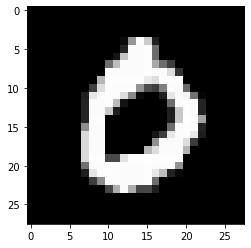

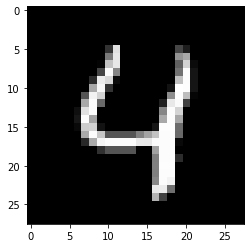

In [60]:
for idx in range(0,5):
    plt.imshow(test_images[idx], cmap = plt.get_cmap('gray'))
    # plt.title(test_labels[idx])
    plt.show()

In [61]:
# Make Dataloader to feed on Multi Layer Perceptron Model 

import torch 
from torch.utils.data import TensorDataset, DataLoader 

train_images_tensor = torch.tensor(train_images)
train_labels_tensor = torch.tensor(train_labels)
train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)
train_loader = DataLoader(train_tensor, batch_size = 64, num_workers = 0, shuffle = True)

valid_images_tensor = torch.tensor(valid_images)
valid_labels_tensor = torch.tensor(valid_labels)
valid_tensor = TensorDataset(valid_images_tensor, valid_labels_tensor)
valid_loader = DataLoader(valid_tensor, batch_size = 64, num_workers = 0, shuffle = True)

test_images_tensor = torch.tensor(test_images)

In [67]:
# Create Multi Layer Perceptron Model
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.log_softmax(x)
        return x

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

model = CNN().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.001)

print("Model: ", model)
print("Device: ", DEVICE)

Model:  CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)
Device:  cuda


In [36]:
# Definite Train & Evaluate 

def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\t Loss: {:.06}%".format(epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))
            
def evaluate(model, valid_loader):
    model.eval()
    valid_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in valid_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            valid_loss += F.cross_entropy(output, target, reduction = "sum").item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(target.view_as(prediction)).sum().item()
            
    valid_loss /= len(valid_loader.dataset)
    valid_accuracy = 100. * correct / len(valid_loader.dataset)
    return valid_loss, valid_accuracy 


In [68]:
''' Training'''

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    valid_loss, valid_accuracy = evaluate(model, valid_loader)
    print("[Epoch: {}], \t Validation Loss: {:.4}, \t Validation Accuracy: {:.2f}%\n".format(epoch, valid_loss, valid_accuracy))


<ipython-input-67-2030b5a81c34>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


Train Epoch: 1 [0/48000 (0%)]	 Loss: 9.42368%
Train Epoch: 1 [6400/48000 (13%)]	 Loss: 0.507214%
Train Epoch: 1 [12800/48000 (27%)]	 Loss: 0.237433%
Train Epoch: 1 [19200/48000 (40%)]	 Loss: 0.077129%
Train Epoch: 1 [25600/48000 (53%)]	 Loss: 0.134507%
Train Epoch: 1 [32000/48000 (67%)]	 Loss: 0.115953%
Train Epoch: 1 [38400/48000 (80%)]	 Loss: 0.0515546%
Train Epoch: 1 [44800/48000 (93%)]	 Loss: 0.147707%
[Epoch: 1], 	 Validation Loss: 0.09276, 	 Validation Accuracy: 97.03%

Train Epoch: 2 [0/48000 (0%)]	 Loss: 0.0138245%
Train Epoch: 2 [6400/48000 (13%)]	 Loss: 0.0207729%
Train Epoch: 2 [12800/48000 (27%)]	 Loss: 0.0583666%
Train Epoch: 2 [19200/48000 (40%)]	 Loss: 0.0544339%
Train Epoch: 2 [25600/48000 (53%)]	 Loss: 0.0669032%
Train Epoch: 2 [32000/48000 (67%)]	 Loss: 0.00536544%
Train Epoch: 2 [38400/48000 (80%)]	 Loss: 0.10918%
Train Epoch: 2 [44800/48000 (93%)]	 Loss: 0.0537394%
[Epoch: 2], 	 Validation Loss: 0.07977, 	 Validation Accuracy: 97.53%

Train Epoch: 3 [0/48000 (0%)]	 

In [39]:
# Predict Test Dataset 

def testset_prediction(model, test_images_tensor):
    model.eval()
    result = []
    with torch.no_grad():
        for data in test_images_tensor:
            data = data.to(DEVICE)
            output = model(data)
            prediction = output.max(1, keepdim = True)[1]
            result.append(prediction.tolist())
    return result


In [40]:
test_predict_result = testset_prediction(model, test_images_tensor)
test_predict_result[:5]


[[[7]], [[2]], [[1]], [[0]], [[4]]]

In [69]:
import numpy as np
from collections import Counter
Counter(np.squeeze(test_predict_result)).most_common()

[(1, 1162),
 (2, 1034),
 (4, 1029),
 (3, 1015),
 (8, 1002),
 (0, 993),
 (9, 988),
 (6, 963),
 (7, 950),
 (5, 864)]

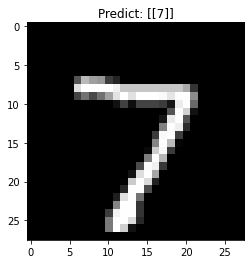

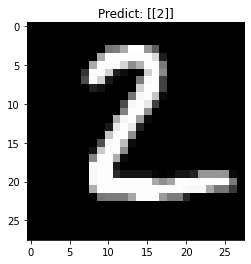

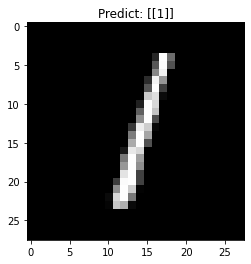

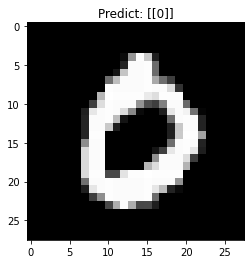

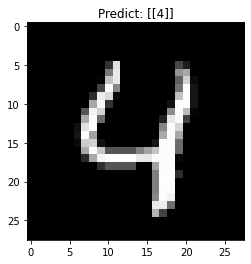

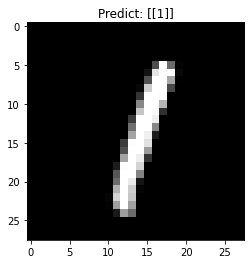

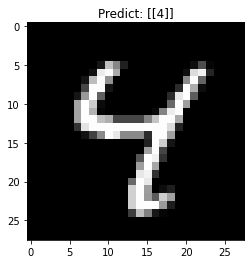

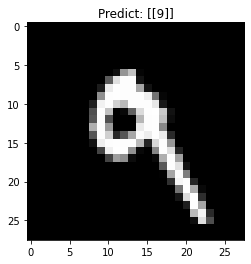

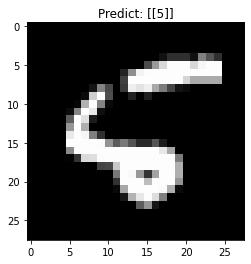

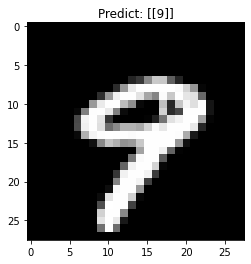

In [44]:
for idx in range(0, 10):
    plt.imshow(test_images[idx], cmap = plt.get_cmap('gray'))
    plt.title("Predict: " + str(test_predict_result[idx]))
    plt.show()